**Clustering** is the process of dividing the datasets into groups, consisting of similar datapoint.
It's an **unsupervised** learning technique. 

**Kmeans** clustering is a algorithm whose main goal is to group **similar elements** or **datapoints** into a cluster.

### Steps of kmeans clustering

* **Step1**: Select the number of cluster to be identified, suppose k=3 or other number.
* **Step2**: Randomly select 3 distinct data point.
* **Step3**: Measure the distance between 1st point and selected 3 cluster.
* **Step4**: Assign the first point to the nearest cluster.
* **Step5**: Calculate the mean value between the first point and the nearest cluster.
* **Step6**: Think the mean value as a cluster then repeat sae steps for 2nd point.
* **Step7**: Same steps for all points.

After we have assign all point to clasters. Then repeat the same process with different cluster point iteration again. Then we need to calculate the sam of variation within each cluster of each iteration. In which iteration the sum of variation is lowest, means this clustering is best.

Even then the algorithm is not completely sure about the cluster, so it will repeat itself and check for few more cluster.

So how many iteration we need to perform. It's up to us. Suppose we want to perform 30 iteration, but the machine will not set 90 point for different cluster. It stops create new clustering when it gets some same results consecutively. So, if we repeat more iteration we will get the same result.

For 2d points the distance between the points and clusters will be euclidean distance.

Number of cluster inversely proportional to variance or Number of cluster proportional to reduction of variance(**Some of square error**). 

The **albow point method** is useful to iterate the number of cluster **k**.

In [1]:
# Import important module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [29,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

np.random.seed(200)  # Makes the random number predictable

#Number of cluster
k = 3

#Centroid
centroids = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]   # Default value of i = 0
    for i in range(k)
}

centroids
df.iloc[1]
df.head(2)

,x,y
0,12,29
1,20,36


In [3]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

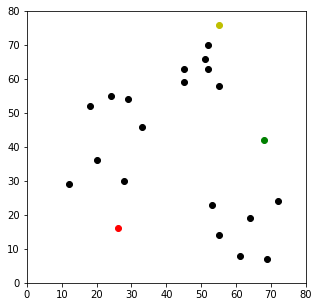

In [4]:
plt.figure(figsize =(5,5))
plt.scatter(df['x'],df['y'], color = 'k')

# Create a colormap
colormap = {1:'r',2:'g',3:'y'}

for i in colormap.keys():
    plt.scatter(*centroids[i], color = colormap[i])

plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

## trial

In [5]:
# Assignment stage. Assign each point at one of the cluster.
for i in colormap.keys():
    if i == 1:
        d1 = np.sqrt((centroids[i][0]-df['x'])**2+(centroids[i][1]-df['y'])**2)
    elif i == 2:
        d2 = np.sqrt((centroids[i][0]-df['x'])**2+(centroids[i][1]-df['y'])**2)
    elif i == 3:
        d3 = np.sqrt((centroids[i][0]-df['x'])**2+(centroids[i][1]-df['y'])**2)
d1.tolist()
d2.tolist()
d3.tolist()
print(' ')

In [6]:
df1 = pd.DataFrame({
    'x': [],
    'y': []
})
data = []
cloumn = list(df1)


for i in range(len(d1)):
    if (d1[i]<d2[i] and d1[i]<d3[i]):
        df0 = df.iloc[i]
        data.append(df0)

df11 = df1.append(data)
df11

,x,y
0,12.0,29.0
1,20.0,36.0
2,28.0,30.0
3,18.0,52.0
5,33.0,46.0
14,55.0,14.0


In [7]:

df2 = pd.DataFrame({
  'x': [],
  'y': []
})
data = []
cloumn = list(df2)


for i in range(len(d1)):
    if (d2[i]<d1[i] and d2[i]<d3[i]):
        df0 = df.iloc[i]
        data.append(df0)
        
df22 = df2.append(data)

df22

,x,y
13,53.0,23.0
15,61.0,8.0
16,64.0,19.0
17,69.0,7.0
18,72.0,24.0


In [8]:

df3 = pd.DataFrame({
   'x': [],
   'y': []
})
data = []
cloumn = list(df3)


for i in range(len(d1)):
    if (d3[i]<d1[i] and d3[i]<d2[i]):
        df0 = df.iloc[i]
        data.append(df0)
        
df33 = df3.append(data)
df33

,x,y
4,29.0,54.0
6,24.0,55.0
7,45.0,59.0
8,45.0,63.0
9,52.0,70.0
10,51.0,66.0
11,52.0,63.0
12,55.0,58.0


(0, 80)

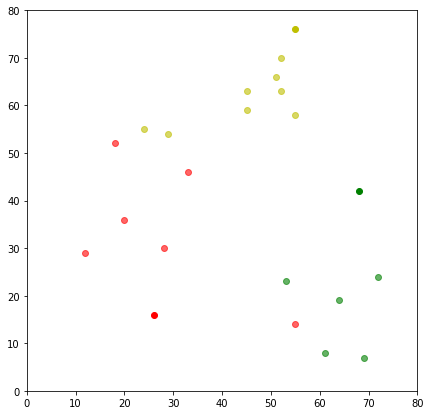

In [9]:
fig = plt.figure(figsize = (7,7))
plt.scatter(df11['x'],df11['y'], color = colormap[1], alpha = 0.6)
plt.scatter(df22['x'],df22['y'], color = colormap[2], alpha = 0.6)
plt.scatter(df33['x'],df33['y'], color = colormap[3], alpha = 0.6)
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
plt.xlim(0,80)
plt.ylim(0,80)

### Now Start again

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  29        19.104973        57.489129        63.702433        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     y


(0, 80)

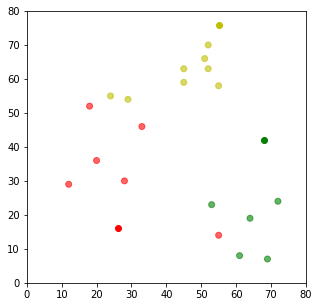

In [10]:
# Assign stage

def assign(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
        np.sqrt((df['x']-centroids[i][0])**2+(df['y']-centroids[i][1])**2)
        )
    centroids_distance = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colormap[x])
    return df

df = assign(df, centroids)
print(df.head())

fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)

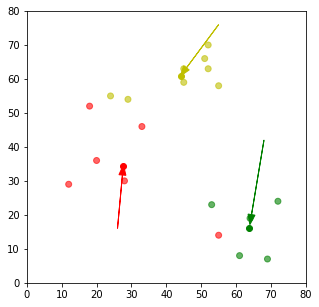

In [11]:
# Update stage
import copy
old_centroids = copy.deepcopy(centroids)

def updt(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return k

centroids = updt(centroids)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)  

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0]) *0.85
    dy = (centroids[i][1]-old_centroids[i][1]) *0.85
    ax.arrow(old_x, old_y, dx, dy, head_width =2, head_length=3, fc=colormap[i], ec=colormap[i])

(0, 80)

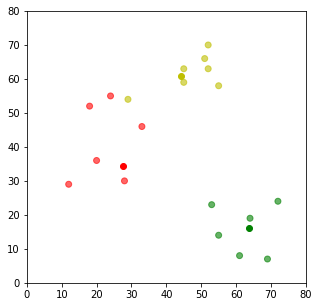

In [12]:
# Here just centroid updated. Now we need repeat assignment stage
df = assign(df, centroids)
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)

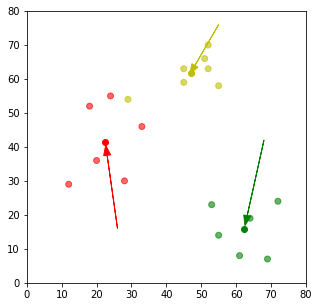

In [13]:
centroids = updt(centroids)

fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)  

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0]) *0.85
    dy = (centroids[i][1]-old_centroids[i][1]) *0.85
    ax.arrow(old_x, old_y, dx, dy, head_width =2, head_length=3, fc=colormap[i], ec=colormap[i])

In [1]:
# Here just centroid updated. Now we need repeat assignment stage
df = assign(df, centroids)
fig = plt.figure(figsize = (5,5))
plt.scatter(df['x'],df['y'], color = df['color'], alpha = 0.6)

for i in centroids.keys():
    plt.scatter(*centroids[i], color = colormap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)

NameError: name 'assign' is not defined

In [2]:
print('hello')

hello
